In [1]:
#Import libraries
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
#Scrape the data and store the file
request= requests.get("https://jsonblob.com/f0b70eef-566b-11eb-9d92-415b3ac53928")
request_text=request.text
#data=json.loads(request_text, encoding='utf-8', strict=False)
data_seralized= json.dump(request_text, open('data.json', "w"),indent=4)

# I am covert the Json data to csv format using online

    Url:-https://apps.thejeshgn.com/json-csv/# 

In [10]:
# Read the data from Local file
os.chdir('C:\\Users\\Maniteja\\Downloads')
df=pd.read_csv('result.csv', encoding='UTF-8')
df.head()

,req/baseUrl,req/body/note/title,req/body/note/desc,req/fresh,req/headers/host,req/headers/user-agent,req/headers/content-type,req/headers/org_id,req/headers/user_session_id,req/headers/accept,...,req/hostname,req/ip,req/originalUrl,req/path,req/protocol,req/secure,req/stale,req/subdomains/0,req/xhr,isSafe
0,/crm/note,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,...,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True
1,/crm/note,Clayton Cooper,As possible American many prepare four strong....,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,...,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True
2,/crm/note,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,...,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,False
3,/crm/note,Laura Fisher,State third represent energy campaign not forg...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,...,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True
4,/crm/note,Tyler Santos,Us enjoy since. Time identify image position o...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,...,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,False


In [31]:
df.shape

(1000, 23)

In [5]:
df.describe()

,req/headers/content-length
count,1000.0
mean,70.0
std,0.0
min,70.0
25%,70.0
50%,70.0
75%,70.0
max,70.0


In [6]:
df.isnull().sum()

req/baseUrl                    0
req/body/note/title            0
req/body/note/desc             0
req/fresh                      0
req/headers/host               0
req/headers/user-agent         0
req/headers/content-type       0
req/headers/org_id             0
req/headers/user_session_id    0
req/headers/accept             0
req/headers/content-length     0
req/headers/user/name          0
req/headers/user/role          0
req/hostname                   0
req/ip                         0
req/originalUrl                0
req/path                       0
req/protocol                   0
req/secure                     0
req/stale                      0
req/subdomains/0               0
req/xhr                        0
isSafe                         0
dtype: int64

In [32]:
X=df.iloc[:,:-1]
y=df['isSafe']

In [29]:
# perform the encoding
X1=pd.get_dummies(X,drop_first=True)
y1=pd.get_dummies(y,drop_first=True)

In [35]:
# Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X1,y1)

<ipython-input-35-dd73ac7128a3>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1,y1)


ExtraTreesClassifier()

In [37]:
print(model.feature_importances_)

[0.         0.         0.         ... 0.0596109  0.05035364 0.05360207]


In [44]:
ranked_features=pd.Series(model.feature_importances_, index= X1.columns)
print(ranked_features.nlargest(20))


req/body/note/desc_note title <title onPropertyChange title onPropertyChange="javascript:javascript:alert(1)"></title onPropertyChange>    0.059611
req/body/note/desc_Meeting ")) or (("x"))=(("x Notes 12:30                                                                                 0.055901
req/body/note/desc_text1<video src=1 href=1 onerror="javascript:alert(1)"></video>hello                                                    0.053602
req/body/note/desc_notes --><!-- -->> <img src=xxx:x onerror=javascript:alert(1)> --> hello de                                             0.050354
req/body/note/desc_admin"/* your section of notes is going to be blank                                                                     0.050053
req/body/note/desc_ext1%3Cvideo+src%3D1+href%3D1+onerror%3D%22javascript%3Aalert%281%29%22%3E%3C%2Fvideo%3E                                0.049594
req/body/note/desc_<img src=1 href=1 onerror="javascript:alert(1)"></img>                                       

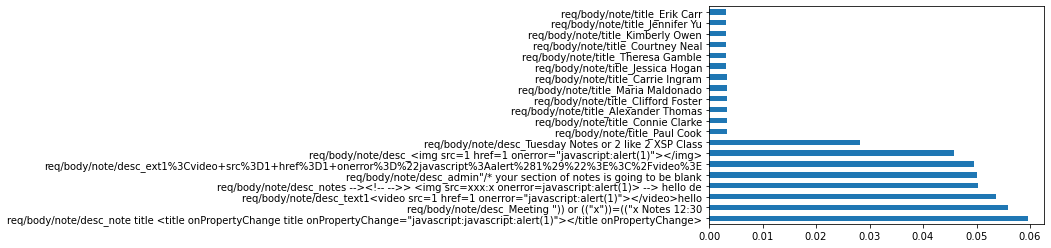

In [50]:
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

In [48]:
# Spli the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y1, test_size=0.3, random_state=0)

In [52]:
#Create the model
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(random_state=10)
model1.fit(X_train,y_train)

<ipython-input-52-c9e83a4a640b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(X_train,y_train)


RandomForestClassifier(random_state=10)

In [54]:
predict=model1.predict(X_test)

from sklearn import metrics

accuracy=metrics.accuracy_score(y_test, predict)
print(accuracy)

0.81
